## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice = combine_df["Mouse ID"].value_counts()
num_mice = len(total_mice)
num_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df['Mouse ID'].isin(duplicate_mice)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_df['Mouse ID'].value_counts()
clean_num_mice = len(clean_total_mice)
clean_num_mice


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
summary_mean

summary_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
summary_median

summary_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
summary_variance
 
summary_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
summary_std

summary_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_sem

summary_data = pd.DataFrame({"Mean": summary_mean, "Median": summary_median, "Variance": summary_variance, "Standard Deviation": summary_std, "SEM": summary_sem})
summary_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_group_by = clean_df.groupby('Drug Regimen')
summary_stats = summary_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

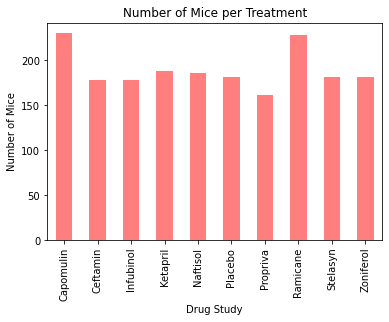

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count = combine_df.groupby(['Drug Regimen']).count()['Mouse ID']

plot_mice_count = mice_count.plot.bar(color='red', alpha=0.5, align="center")
plt.xlabel('Drug Study')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Treatment')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

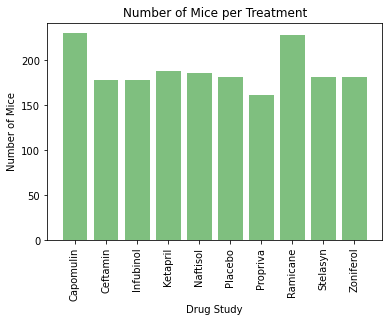

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice = combine_df.groupby(["Drug Regimen"])["Mouse ID"].count()
num_mice

x_axis = np.arange(len(mice_count))
plt.bar(x_axis, num_mice, color='green', alpha=0.5, align="center")

mice = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice, rotation="vertical")

plt.xlabel("Drug Study")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = combine_df.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]

gender["Percentage of Sex"] = (100*(gender['Total Count'] / gender["Total Count"].sum()))

gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


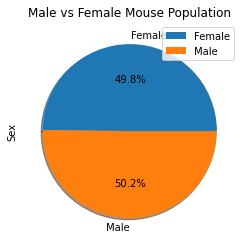

In [14]:
gender.plot.pie(y='Total Count', shadow=True, autopct = "%1.1f%%")

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

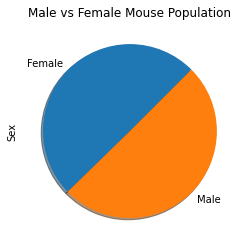

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

percentages = [49.8, 50.2]
labels = ["Female", "Male"]
plt.pie(percentages, startangle=45, labels=labels, shadow=True)

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = combine_df.loc[combine_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combine_df.loc[combine_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = combine_df.loc[combine_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = combine_df.loc[combine_df["Drug Regimen"] == "Ceftamin",:]

In [17]:
last_Capomulin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
vol_Capomulin = pd.DataFrame(last_Capomulin)
Capomulin_merge = pd.merge(vol_Capomulin, combine_df, on=("Mouse ID", "Timepoint"))
Capomulin_merge.head()

Capomulin_data = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin_data.quantile([.25,.5,.75])
lowerQ = quartiles[.25]
upperQ = quartiles[.75]
iqr = upperQ-lowerQ

print(f'The lower quartile of Capomulin tumors: {lowerQ}')
print(f'The upper quartile of Capomulin tumors: {upperQ}')
print(f'The interquartile quartile of Capomulin tumors: {iqr}')
print(f'The median of Capomulin tumors: {quartiles[.5]}')

lower_bound = lowerQ - (1.5*iqr)
upper_bound = upperQ - (1.5*iqr)

print(f'Data above {upper_bound} are the outliers of the dataset.')
print(f'Data below {lower_bound} are the outliers of the dataset.')



The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile quartile of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996
Data above 28.486425109999995 are the outliers of the dataset.
Data below 20.70456164999999 are the outliers of the dataset.


In [18]:
last_Ramicane = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
vol_Ramicane = pd.DataFrame(last_Ramicane)
Ramicane_merge = pd.merge(vol_Ramicane, combine_df, on=("Mouse ID", "Timepoint"))
Ramicane_merge.head()

Ramicane_data = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_data.quantile([.25,.5,.75])
lowerQ = quartiles[.25]
upperQ = quartiles[.75]
iqr = upperQ-lowerQ

print(f'The lower quartile of Ramicane tumors: {lowerQ}')
print(f'The upper quartile of Ramicane tumors: {upperQ}')
print(f'The interquartile quartile of Ramicane tumors: {iqr}')
print(f'The median of Ramicane tumors: {quartiles[.5]}')

lower_bound = lowerQ - (1.5*iqr)
upper_bound = upperQ - (1.5*iqr)

print(f'Data above {upper_bound} are the outliers of the dataset.')
print(f'Data below {lower_bound} are the outliers of the dataset.')

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile quartile of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Data above 27.01120119 are the outliers of the dataset.
Data below 17.912664470000003 are the outliers of the dataset.


In [19]:
last_Infubinol = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
vol_Infubinol = pd.DataFrame(last_Infubinol)
Infubinol_merge = pd.merge(vol_Infubinol, combine_df, on=("Mouse ID", "Timepoint"))
Infubinol_merge.head()

Infubinol_data = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_data.quantile([.25,.5,.75])
lowerQ = quartiles[.25]
upperQ = quartiles[.75]
iqr = upperQ-lowerQ

print(f'The lower quartile of Infubinol tumors: {lowerQ}')
print(f'The upper quartile of Infubinol tumors: {upperQ}')
print(f'The interquartile quartile of Infubinol tumors: {iqr}')
print(f'The median of Infubinol tumors: {quartiles[.5]}')

lower_bound = lowerQ - (1.5*iqr)
upper_bound = upperQ - (1.5*iqr)

print(f'Data above {upper_bound} are the outliers of the dataset.')
print(f'Data below {lower_bound} are the outliers of the dataset.')

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile quartile of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
Data above 48.310040109999996 are the outliers of the dataset.
Data below 36.83290494999999 are the outliers of the dataset.


In [20]:
last_Ceftamin = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
vol_Ceftamin = pd.DataFrame(last_Ceftamin)
Ceftamin_merge = pd.merge(vol_Ceftamin, combine_df, on=("Mouse ID", "Timepoint"))
Ceftamin_merge.head()

Ceftamin_data = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_data.quantile([.25,.5,.75])
lowerQ = quartiles[.25]
upperQ = quartiles[.75]
iqr = upperQ-lowerQ

print(f'The lower quartile of Ceftamin tumors: {lowerQ}')
print(f'The upper quartile of Ceftamin tumors: {upperQ}')
print(f'The interquartile quartile of Ceftamin tumors: {iqr}')
print(f'The median of Ceftamin tumors: {quartiles[.5]}')

lower_bound = lowerQ - (1.5*iqr)
upper_bound = upperQ - (1.5*iqr)

print(f'Data above {upper_bound} are the outliers of the dataset.')
print(f'Data below {lower_bound} are the outliers of the dataset.')

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile quartile of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
Data above 40.93320176 are the outliers of the dataset.
Data below 25.355449580000002 are the outliers of the dataset.


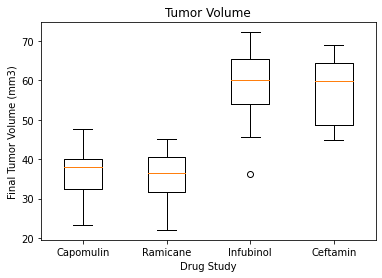

In [21]:
# Generate a box plot of the fin"Finalal tumor volume of each mouse across four regimens of interest
plot_data = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]

selected_mouse = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.boxplot(plot_data, labels=selected_mouse)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Study")
plt.title("Tumor Volume")

plt.show()


## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=='x401',:]
line_df.head()                                

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0


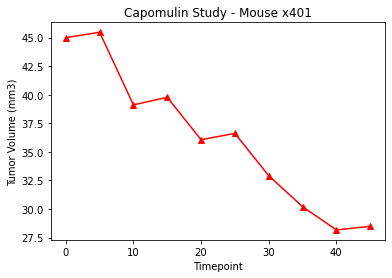

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = line_df["Timepoint"]
Tumor_size = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis, Tumor_size, color = "Red", marker = "^")
plt.title("Capomulin Study - Mouse x401")
plt.xlabel('Timepoint') 
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

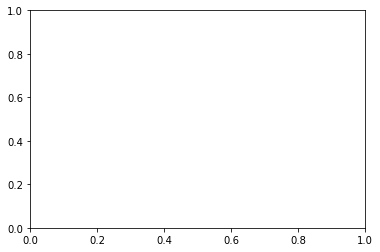

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots()
average_capomulin = Capomulin_df.groupby(['Mouse ID']).mean()
